Basic Operations.

1. Swap Gate. See QCQI p23

In [1]:
from qiskit import Aer, QuantumCircuit, assemble
from qiskit.visualization import array_to_latex
from math import sqrt
from numpy import asarray
sim = Aer.get_backend("aer_simulator")

In [2]:
def swap_qubits(ckt, qbit1, qbit2):
    ckt.cx(qbit1, qbit2)
    ckt.cx(qbit2, qbit1)
    ckt.cx(qbit1, qbit2)
    return ckt

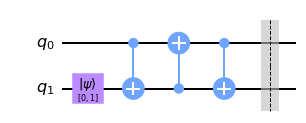

In [3]:
c = QuantumCircuit(2)
c.initialize([0, 1], 1)
swap_qubits(c, 0, 1)
c.save_statevector()
c.draw("mpl")

In [4]:
array_to_latex(sim.run(assemble(c)).result().get_statevector(), prefix="\\text{State after swap = }")

<IPython.core.display.Latex object>

2. Increment mod 8

In [5]:
def increment(n):
    c = QuantumCircuit(3)

    for i in range(3):
        c.initialize([0, 1] if (n % 2) else [1, 0], i)
        n //= 2
    
    c.ccx(0, 1, 2) 
    c.cx(0, 1)
    c.x(0)
    c.save_statevector()
    #for i in range(3): c.measure(i, i)
    return c


Circuit diagram: 


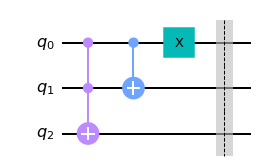

In [6]:
# print the circuit diagram
c = QuantumCircuit(3); c.ccx(0, 1, 2); c.cx(0, 1); c.x(0); c.barrier()
print("\nCircuit diagram: "); c.draw(output="mpl")


In [7]:
for n in range(8):
    c = increment(n)
    vec = sim.run(assemble(c)).result().get_statevector()
    for i in range(len(asarray(vec))):
        if vec[i] == 1: print(f"incremented from {n} to {i}"); break

incremented from 0 to 1
incremented from 1 to 2
incremented from 2 to 3
incremented from 3 to 4
incremented from 4 to 5
incremented from 5 to 6
incremented from 6 to 7
incremented from 7 to 0
